#Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

In [1]:
#Get data, let's go with food01 dataset which is 101 different types of food from kaggle, however we modified it to binary classification(only steak and pizza)
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2021-08-30 10:03:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 64.233.184.128, 66.102.1.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  47.5MB/s    in 2.2s    

2021-08-30 10:03:50 (47.5 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [2]:
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

##Inspect the data

Always visualize many samples in case of a computer vision problem

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/

pizza  steak


In [5]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [6]:
import os

#Walk through the pizza_steak directory and list number of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [7]:
!ls pizza_steak

test  train


In [8]:
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first lets get our class names programmatically

In [9]:
#Get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")])) #Created a list of classnames from subdirectories
print(class_names)

['.DS_Store' 'pizza' 'steak']


In [10]:
class_names=class_names[1:] #Get rid of DS_Store
class_names

array(['pizza', 'steak'], dtype='<U9')

### View random image function

In [11]:
#Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir,target_class):
  #Setup the target directory (we'll view images from here)
  target_folder=target_dir+"/"+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  #Read the image and plot it
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  print(f"Image Shape:{img.shape}")
  return img

Image Shape:(512, 512, 3)


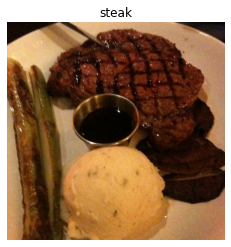

In [12]:
img = view_random_image(target_dir="pizza_steak/train",
                        target_class="steak")

Let's build a CNN to find patterns in our images

* Load our images
* Preprocess our images
* Build a CNN
* Compile and Fit it

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

#Brings all the pixel values between 0 & 1
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

#Setup paths to our data Directories
train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"

train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)
valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)

model_1=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_1_history = model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                              validation_data=valid_data,
                              validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 42s 254ms/step - loss: 0.5518 - accuracy: 0.7100 - val_loss: 0.4150 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 11s 228ms/step - loss: 0.4135 - accuracy: 0.8107 - val_loss: 0.3314 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 11s 229ms/step - loss: 0.3818 - accuracy: 0.8327 - val_loss: 0.3601 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 11s 227ms/step - loss: 0.3588 - accuracy: 0.8373 - val_loss: 0.3202 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 11s 234ms/step - loss: 0.3116 - accuracy: 0.8700 - val_loss: 0.2959 - val_accuracy: 0.8860


In [14]:
import tensorflow as tf
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Ler's do this again

Image Shape:(512, 308, 3)
Image Shape:(512, 512, 3)


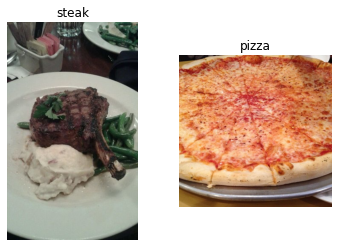

In [16]:
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

### Preprocess the data (Prepare it for the model)

In [17]:
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small amount of data. Rather than looking at all 10,000 images at a time, a model looks at 32 at a time 


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1.0/255)
test_datagen=ImageDataGenerator(rescale=1.0/255)

train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32)

test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           class_mode='binary',
                                           batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [19]:
#Get a sample of a train data branch
images,labels=train_data.next() #Get the "next" batch of images/labels in train_data
len(images),len(labels)

(32, 32)

In [20]:
len(train_data) #1500/32

47

In [21]:
#View the first batch of labels
labels #0 for pizza and 1 for steak

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
      dtype=float32)

#Create a CNN Model (Start with a base line)



In [22]:
#Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


model_2=Sequential([
    Conv2D(filters=10,kernel_size=3,strides=1,padding="valid",activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid") #Output layer, only 1 output since binary
])

In [23]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_1 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(learning_rate=0.001),
                metrics=["accuracy"])

model_2_history=model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                            validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 248ms/step - loss: 0.9792 - accuracy: 0.6673 - val_loss: 0.4324 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 11s 232ms/step - loss: 0.4147 - accuracy: 0.8233 - val_loss: 0.3886 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 11s 232ms/step - loss: 0.2910 - accuracy: 0.9007 - val_loss: 0.3476 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 11s 242ms/step - loss: 0.1513 - accuracy: 0.9493 - val_loss: 0.3929 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 11s 241ms/step - loss: 0.0681 - accuracy: 0.9807 - val_loss: 0.4686 - val_accuracy: 0.8180


#Evaluate our Model


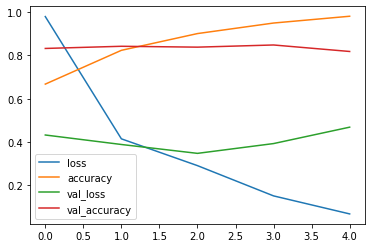

In [25]:
import pandas as pd
pd.DataFrame(model_2_history.history).plot()

### Plot loss curves functioin

In [26]:
#Plot the validation and training curves seperately
def plot_loss_curves(history):
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs=range(len(history.history["loss"]))
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()
  
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

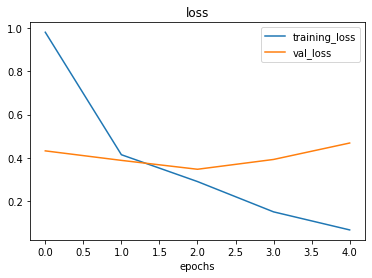

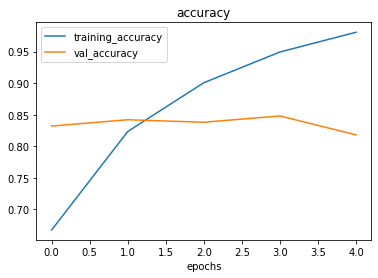

In [27]:
plot_loss_curves(model_2_history)

# The Validation loss starts to increase as epochs increase, it is overfitting


#Let's fix this, (Adjust Model Parameters)

Fitting a ML mdoel comes in 3 steps:
0. Create a Baseline
1. Beat the baseline by Overfitting a larger model
2. Reduce Overfitting

Reduce Overfitting:
0. Add regularization layers (like MaxPool2D)
1. Add Data Augmentation
2. Add more data... and so on

In [28]:
model_3=Sequential([
  Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1,activation="sigmoid")
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

model_3_history=model_3.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 216ms/step - loss: 0.6430 - accuracy: 0.6307 - val_loss: 0.4981 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4829 - accuracy: 0.7680 - val_loss: 0.4123 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 10s 217ms/step - loss: 0.4400 - accuracy: 0.7947 - val_loss: 0.3505 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 10s 219ms/step - loss: 0.3817 - accuracy: 0.8307 - val_loss: 0.3757 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 10s 217ms/step - loss: 0.3651 - accuracy: 0.8460 - val_loss: 0.3727 - val_accuracy: 0.8360


In [29]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6760)             

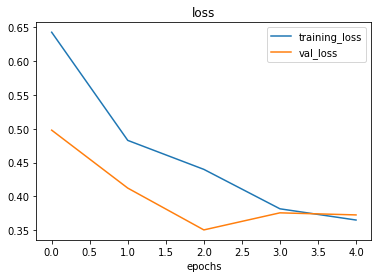

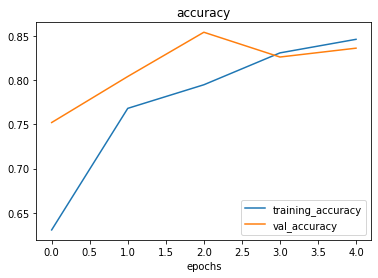

In [30]:
plot_loss_curves(model_3_history)

#Opening our bag of tricks and finding Data Augmentation

In [31]:
#Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented=ImageDataGenerator(rescale=1.0/255,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           horizontal_flip=True)

#Create ImageDataGenerator without data augmentation
train_datagen=ImageDataGenerator(rescale=1.0/255)
test_datagen=ImageDataGenerator(rescale=1.0/255)

#What is Data Augmentation?

Data Augmentation is the process of altering our training data, leading it to have more diversity and inturn allowing our models to learn more generalisable patterns and Altering might mean **rotation of image, cropping it, flipping it etc.,**

Let's write some code to visualize Data Augmentation

In [32]:
#Import data and augment it from training directory
print("Augmented Training Data:")
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,target_size=(224,224),
                                             batch_size=32,class_mode='binary',
                                             shuffle=False)
#Create non-augmented Data
print("Non-Augmented Training Data:")
train_data=train_datagen.flow_from_directory(train_dir,target_size=(224,224),
                                              batch_size=32,class_mode='binary',
                                              shuffle=False)

print("Non-Augmented test Data:")
test_data=test_datagen.flow_from_directory(test_dir,target_size=(224,224),
                                           batch_size=32,class_mode='binary')

Augmented Training Data:
Found 1500 images belonging to 2 classes.
Non-Augmented Training Data:
Found 1500 images belonging to 2 classes.
Non-Augmented test Data:
Found 500 images belonging to 2 classes.


**Note:** Data Augmentation is usually only performed on the training data. Using 'ImageDataenerator' built-in data augmentaiton parameters our images are left as they are in the directories but modified as they're loaded into the model

Finally.. let's visualize some Augmented Data

In [33]:
#Get some data batches of Aug and Non-Augmented sets
images,labels=train_data.next()
augmented_images,augmented_labels=train_data_augmented.next() #labels aren't augmented, only images data is augmented

Showing image number:15


(-0.5, 223.5, 223.5, -0.5)

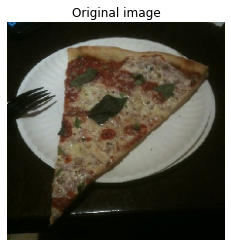

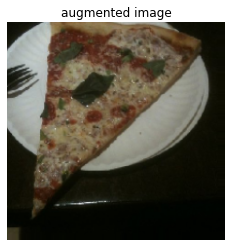

In [34]:
#Show the original image and the augmented image

import random
random_number=random.randint(0,32)
print("Showing image number:{}".format(random_number))
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("augmented image")
plt.axis(False)

Let's compare augmented-trained NN and non-augmented trained NN models

In [35]:
model_4=Sequential([
  Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Flatten(),
  Dense(1,activation="sigmoid")
])

model_4.compile(loss="binary_crossentropy",optimizer=Adam(),
                metrics=['accuracy'])

model_4_history=model_4.fit(train_data_augmented,epochs=5,
                            steps_per_epoch=len(train_data_augmented),
                            validation_data=test_data,
                            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 547ms/step - loss: 0.7318 - accuracy: 0.5033 - val_loss: 0.6806 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 25s 537ms/step - loss: 0.6963 - accuracy: 0.5313 - val_loss: 0.6964 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 25s 534ms/step - loss: 0.7067 - accuracy: 0.4633 - val_loss: 0.6767 - val_accuracy: 0.6020
Epoch 4/5
47/47 [==============================] - 25s 537ms/step - loss: 0.6747 - accuracy: 0.5813 - val_loss: 0.6491 - val_accuracy: 0.6400
Epoch 5/5
47/47 [==============================] - 25s 536ms/step - loss: 0.6644 - accuracy: 0.5967 - val_loss: 0.6138 - val_accuracy: 0.6960


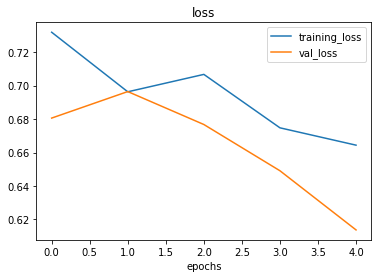

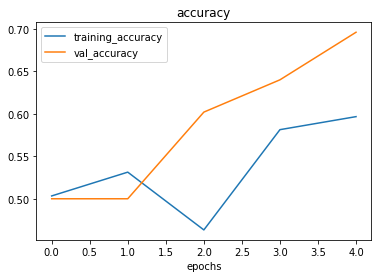

In [36]:
plot_loss_curves(model_4_history)

Let's shuffle our augmented training data and train another model with same parameters

In [37]:
train_data_augmented_shuffled=train_datagen_augmented.flow_from_directory(train_dir,
                                                                          target_size=(224,224),
                                                                          class_mode="binary",
                                                                          shuffle=True,
                                                                          batch_size=32)

Found 1500 images belonging to 2 classes.


In [38]:
model_5=Sequential([
  Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1,activation='sigmoid')
])

model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_5=model_5.fit(train_data_augmented_shuffled,epochs=5,
                      steps_per_epoch=len(train_data_augmented_shuffled),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 540ms/step - loss: 0.6447 - accuracy: 0.6167 - val_loss: 0.5676 - val_accuracy: 0.6900
Epoch 2/5
47/47 [==============================] - 25s 542ms/step - loss: 0.5968 - accuracy: 0.6747 - val_loss: 0.4578 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 25s 540ms/step - loss: 0.5030 - accuracy: 0.7613 - val_loss: 0.4119 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 25s 537ms/step - loss: 0.4670 - accuracy: 0.7893 - val_loss: 0.4209 - val_accuracy: 0.8040
Epoch 5/5
47/47 [==============================] - 25s 534ms/step - loss: 0.4654 - accuracy: 0.7947 - val_loss: 0.3363 - val_accuracy: 0.8600


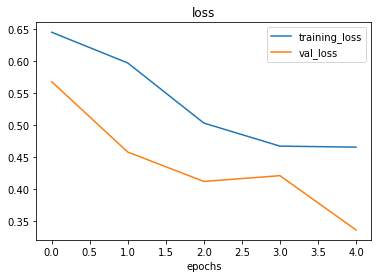

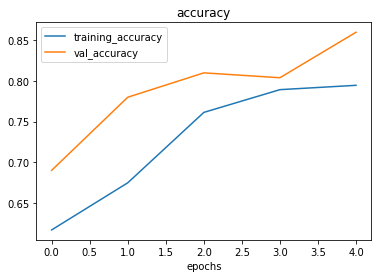

In [39]:
plot_loss_curves(history_5)

**Thus, always shuffle your training data**

Let's continue to improve our Model

In [40]:
#Making a prediction with our trained model on our own custom image
print(class_names)

['pizza' 'steak']


(450, 800, 3)


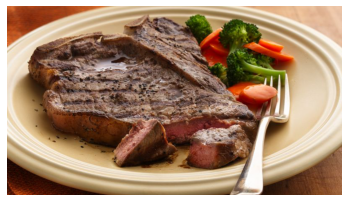

In [41]:
myimg=mpimg.imread("custom_steak.jpg")
plt.imshow(myimg)
plt.axis(False)
print(myimg.shape)

#We need to preprocess this image 

In [42]:
#Create a function to preprocess our image in order to be able to use in our model
def load_and_prep_image(filename,image_shape=224):
  #Read in the image
  img=tf.io.read_file(filename)
  #Decode the read file into a tensor
  img=tf.image.decode_image(img)
  #Resize the image
  img=tf.image.resize(img,size=[image_shape,image_shape])
  #Rescale the image and get all values between 0 and 1
  img/=255.0
  return img

In [43]:
steak=load_and_prep_image("custom_steak.jpg")

In [44]:
model_5.predict(tf.expand_dims(steak,axis=0))

array([[0.9204123]], dtype=float32)

In [45]:
def pred_and_plot(model,filename,class_names=class_names):
  img=load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img,axis=0))
  pred_class=class_names[int(np.argmax(pred[0]))]
  plt.imshow(img)
  plt.title("Prediction: {}".format(pred_class))
  plt.axis(False)

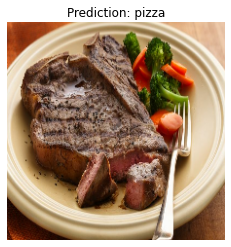

In [46]:
pred_and_plot(model_5,"custom_steak.jpg",class_names)

###Multi-Class Image Classification

Steps:
* Become one with the data
* Preprocess the data
* Create and fit the model(overfit it to make sure it works)
* Evaluate the model
* Adjust hyperparameters
* Repeat until satisfied


In [47]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2021-08-30 10:12:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.167.128, 64.233.166.128, 74.125.133.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.167.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   114MB/s    in 5.3s    

2021-08-30 10:12:17 (93.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [48]:
import os

#Walk through 10 classes of image data
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} files in '{dirpath}'")

There are 2 directories and 0 files in '10_food_classes_all_data'
There are 10 directories and 0 files in '10_food_classes_all_data/test'
There are 0 directories and 250 files in '10_food_classes_all_data/test/hamburger'
There are 0 directories and 250 files in '10_food_classes_all_data/test/chicken_wings'
There are 0 directories and 250 files in '10_food_classes_all_data/test/fried_rice'
There are 0 directories and 250 files in '10_food_classes_all_data/test/sushi'
There are 0 directories and 250 files in '10_food_classes_all_data/test/pizza'
There are 0 directories and 250 files in '10_food_classes_all_data/test/ice_cream'
There are 0 directories and 250 files in '10_food_classes_all_data/test/steak'
There are 0 directories and 250 files in '10_food_classes_all_data/test/chicken_curry'
There are 0 directories and 250 files in '10_food_classes_all_data/test/grilled_salmon'
There are 0 directories and 250 files in '10_food_classes_all_data/test/ramen'
There are 10 directories and 0 fil

In [49]:
#Setup the train and test directories
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [50]:
#let's get class names
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Image Shape:(512, 512, 3)


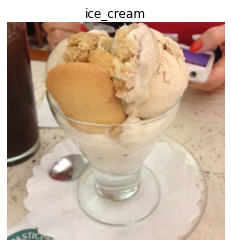

In [51]:
import random
img = view_random_image(target_dir=train_dir,target_class=random.choice(class_names))

2. Preprocess the data (Prepare it for a model)

In [52]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

test_data=test_datagen.flow_from_directory(test_dir,target_size=(224,224),
                                           batch_size=32,class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [53]:
# Create the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam
model_6 = Sequential([
  Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
  Conv2D(10,3,activation='relu'),
  MaxPool2D(),
  Conv2D(10,3,activation="relu"),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10,activation="softmax")
])

model_6.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

history_6=model_6.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                      validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 57s 240ms/step - loss: 2.1864 - accuracy: 0.1951 - val_loss: 1.9945 - val_accuracy: 0.2840
Epoch 2/5
235/235 [==============================] - 56s 237ms/step - loss: 1.8587 - accuracy: 0.3579 - val_loss: 1.8599 - val_accuracy: 0.3448
Epoch 3/5
235/235 [==============================] - 55s 234ms/step - loss: 1.4543 - accuracy: 0.5115 - val_loss: 1.9009 - val_accuracy: 0.3428
Epoch 4/5
235/235 [==============================] - 55s 235ms/step - loss: 0.8287 - accuracy: 0.7363 - val_loss: 2.5123 - val_accuracy: 0.2968
Epoch 5/5
235/235 [==============================] - 56s 238ms/step - loss: 0.3346 - accuracy: 0.9000 - val_loss: 3.3795 - val_accuracy: 0.2748


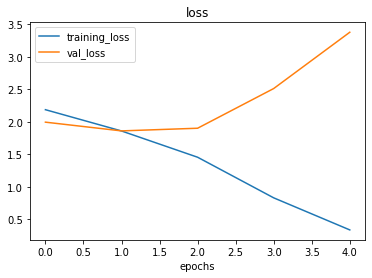

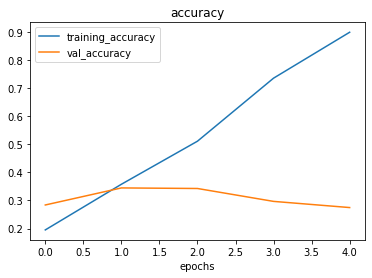

In [54]:
plot_loss_curves(history_6) #overfitting

### Now reduce Overfitting

In [55]:
#Let's simplify our model first, later Augment the training data
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 28090)            

In [56]:
model_7 = Sequential([
  Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10,activation="softmax")
])

model_7.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

In [57]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 29160)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
________________________________________________

In [58]:
history_7=model_7.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                      validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 50s 213ms/step - loss: 2.1505 - accuracy: 0.2263 - val_loss: 2.0000 - val_accuracy: 0.3028
Epoch 2/5
235/235 [==============================] - 50s 211ms/step - loss: 1.8088 - accuracy: 0.3801 - val_loss: 1.9669 - val_accuracy: 0.3140
Epoch 3/5
235/235 [==============================] - 50s 211ms/step - loss: 1.4016 - accuracy: 0.5380 - val_loss: 2.1209 - val_accuracy: 0.3056
Epoch 4/5
235/235 [==============================] - 50s 212ms/step - loss: 0.8355 - accuracy: 0.7432 - val_loss: 2.4957 - val_accuracy: 0.2808
Epoch 5/5
235/235 [==============================] - 50s 212ms/step - loss: 0.3974 - accuracy: 0.8916 - val_loss: 3.1254 - val_accuracy: 0.2664


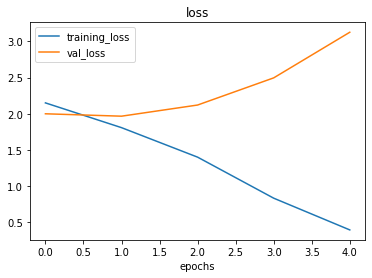

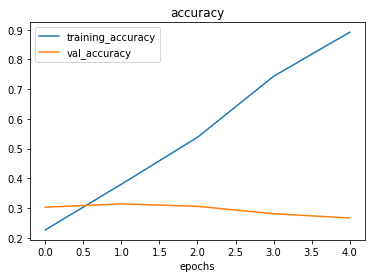

In [59]:
plot_loss_curves(history_7)  #Didn't work

### Reduce overfitting with Data Augmentation

In [60]:
train_datagen_aug=ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.2,
                                     shear_range=0.2,
                                     width_shift_range=0.2,height_shift_range=0.2,
                                     horizontal_flip=True,
                                     zoom_range=0.2)
train_data_aug=train_datagen_aug.flow_from_directory(train_dir,
                                                     batch_size=32,
                                                     class_mode="categorical",
                                                     target_size=(224,224))

Found 7500 images belonging to 10 classes.


In [ ]:
model_8=tf.keras.models.clone_model(model_6)

#Compile the clones model
model_8.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

history_8 = model_8.fit(train_data_aug,epochs=5,steps_per_epoch=len(train_data_aug),
                        validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 130s 552ms/step - loss: 2.2449 - accuracy: 0.1616 - val_loss: 2.1165 - val_accuracy: 0.2244
Epoch 2/5
235/235 [==============================] - 128s 544ms/step - loss: 2.1360 - accuracy: 0.2191 - val_loss: 2.0148 - val_accuracy: 0.2784
Epoch 3/5
235/235 [==============================] - 129s 551ms/step - loss: 2.0950 - accuracy: 0.2464 - val_loss: 1.9741 - val_accuracy: 0.3056
Epoch 4/5
173/235 [=====================>........] - ETA: 30s - loss: 2.0496 - accuracy: 0.2696

In [ ]:
plot_loss_curves(history_8) # Much Better

In [ ]:
import matplotlib.image as mpimg
img = mpimg.imread("custom_steak.jpg")
plt.imshow(img)

In [ ]:
pred_and_plot(model_8,"custom_steak.jpg",class_names) 

In [ ]:
model_8.save("saved_trained_model_8")